In [52]:
%pip install tensorflow keras scikit-image

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [53]:
import os
import numpy as np
import pandas as pd
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input

resize_tuple = (128, 128)
pooling = 'max'  # 'avg' ou 'max'
model_16 = VGG16(weights='imagenet', include_top=False, pooling=pooling)
model_19 = VGG19(weights='imagenet', include_top=False, pooling=pooling)

In [54]:
images_dir = '../images'
image_paths = []
for filename in os.listdir(images_dir):
    if filename.endswith('.jpg'):
        image_paths.append(os.path.join(images_dir, filename))

image_paths

['../images/american_bulldog_192.jpg',
 '../images/american_bulldog_190.jpg',
 '../images/american_bulldog_37.jpg',
 '../images/Abyssinian_150.jpg',
 '../images/american_bulldog_142.jpg',
 '../images/american_pit_bull_terrier_78.jpg',
 '../images/Abyssinian_157.jpg',
 '../images/american_pit_bull_terrier_2.jpg',
 '../images/Abyssinian_68.jpg',
 '../images/Bengal_61.jpg',
 '../images/american_bulldog_63.jpg',
 '../images/american_pit_bull_terrier_60.jpg',
 '../images/Abyssinian_119.jpg',
 '../images/Bengal_117.jpg',
 '../images/Bengal_201.jpg',
 '../images/american_pit_bull_terrier_145.jpg',
 '../images/american_bulldog_12.jpg',
 '../images/american_pit_bull_terrier_131.jpg',
 '../images/american_pit_bull_terrier_119.jpg',
 '../images/american_bulldog_93.jpg',
 '../images/american_bulldog_197.jpg',
 '../images/Abyssinian_88.jpg',
 '../images/Abyssinian_196.jpg',
 '../images/Abyssinian_125.jpg',
 '../images/american_pit_bull_terrier_124.jpg',
 '../images/Abyssinian_133.jpg',
 '../images/

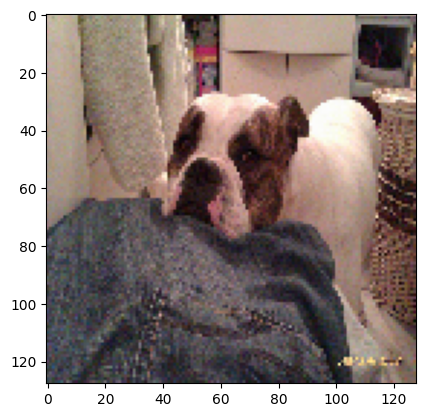

In [55]:
from keras.preprocessing.image import load_img

image = image_paths[10]

# acredito que o a interpolation do skimage é bicubic
img = load_img(image, target_size=(128, 128), interpolation='nearest')

import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

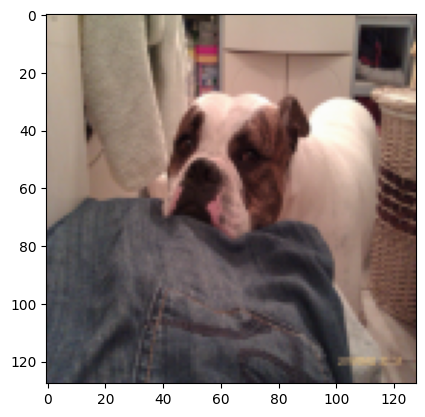

In [56]:
from skimage import io
from skimage.transform import resize

image = io.imread(image_paths[10])
red_image = resize(image, (128, 128))

plt.imshow(red_image)
plt.show()

In [57]:

from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

features_flatten_16 = []

for image_path in image_paths:
    print(f"Extracting features of {image_path}...")
    red_image = load_img(image_path, target_size=resize_tuple)
    
    x = img_to_array(red_image)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features_model_16 = model_16.predict(x)
    features_flatten_16.append(features_model_16.flatten())

Extracting features of ../images/american_bulldog_192.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Extracting features of ../images/american_bulldog_190.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Extracting features of ../images/american_bulldog_37.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Extracting features of ../images/Abyssinian_150.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Extracting features of ../images/american_bulldog_142.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Extracting features of ../images/american_pit_bull_terrier_78.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Extracting features of ../images/Abyssinian_157.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Extracting features of ../images/american_pit_bull_terrier_2.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Extracting features of ../images/Abyssinian_68.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Extracting features of ../images/Bengal_61.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Extracting features of ..

In [58]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

features_flatten_19 = []

for image_path in image_paths:
    print(f"Extracting features of {image_path}...")
    red_image = load_img(image_path, target_size=resize_tuple)
    
    x = img_to_array(red_image)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features_model_19 = model_19.predict(x)
    features_flatten_19.append(features_model_19.flatten())

Extracting features of ../images/american_bulldog_192.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
Extracting features of ../images/american_bulldog_190.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Extracting features of ../images/american_bulldog_37.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Extracting features of ../images/Abyssinian_150.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Extracting features of ../images/american_bulldog_142.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Extracting features of ../images/american_pit_bull_terrier_78.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Extracting features of ../images/Abyssinian_157.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Extracting features of ../images/american_pit_bull_terrier_2.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Extracting features of ../images/Abyssinian_68.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Extracting features of ../images/Bengal_61.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Extracting features of .

In [59]:
len(features_flatten_16)

798

In [60]:
len(features_flatten_19)

798

In [61]:
classe = [
    (
        "american_bulldog"
        if "american_bulldog" in file
        else (
            "american_pit_bull_terrier"
            if "american_pit_bull_terrier" in file
            else (
                "bengal"
                if "Bengal" in file
                else "abyssinian" if "Abyssinian" in file else file
            )
        )
    )
    for file in image_paths
]

In [62]:
data_16 = {"classe": classe, "cnn_features": features_flatten_16}
df_16 = pd.DataFrame(data_16)
df_16.head()

,classe,cnn_features
0,american_bulldog,"[0.0, 20.195314, 62.85331, 0.64154786, 76.8551..."
1,american_bulldog,"[206.14836, 0.0, 104.35965, 0.0, 71.27163, 111..."
2,american_bulldog,"[60.264805, 0.0, 7.662451, 18.425264, 22.31044..."
3,abyssinian,"[0.0, 0.0, 89.472466, 26.471275, 12.841696, 0...."
4,american_bulldog,"[103.472275, 18.401127, 53.51781, 6.050397, 9...."


In [63]:
data_19 = {"classe": classe, "cnn_features": features_flatten_19}
df_19 = pd.DataFrame(data_19)
df_19.head()

,classe,cnn_features
0,american_bulldog,"[19.544718, 4.2685056, 54.273888, 0.0, 86.0767..."
1,american_bulldog,"[10.212103, 0.0, 22.32274, 0.0, 130.02989, 15...."
2,american_bulldog,"[0.0, 27.862268, 8.749671, 0.0, 24.222897, 42...."
3,abyssinian,"[0.0, 33.334637, 0.0, 89.62738, 7.2738276, 0.3..."
4,american_bulldog,"[67.01056, 8.833516, 46.50595, 0.0, 89.55882, ..."


In [64]:
# transformando cada valor do hog_feature em um atributo (coluna)
df2_16 = pd.DataFrame(df_16['cnn_features'].tolist())
df2_16.columns = df2_16.columns.map(lambda x: f'cnn_feature_{x+1}')
df_16 = pd.concat([df_16.drop('cnn_features', axis=1), df2_16], axis=1)


df_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Columns: 513 entries, classe to cnn_feature_512
dtypes: float32(512), object(1)
memory usage: 1.6+ MB


In [65]:
# transformando cada valor do hog_feature em um atributo (coluna)
df2_19 = pd.DataFrame(df_19['cnn_features'].tolist())
df2_19.columns = df2_19.columns.map(lambda x: f'cnn_feature_{x+1}')
df_19 = pd.concat([df_19.drop('cnn_features', axis=1), df2_19], axis=1)


df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Columns: 513 entries, classe to cnn_feature_512
dtypes: float32(512), object(1)
memory usage: 1.6+ MB


In [66]:
df_16.head()

,classe,cnn_feature_1,cnn_feature_2,cnn_feature_3,cnn_feature_4,cnn_feature_5,cnn_feature_6,cnn_feature_7,cnn_feature_8,cnn_feature_9,...,cnn_feature_503,cnn_feature_504,cnn_feature_505,cnn_feature_506,cnn_feature_507,cnn_feature_508,cnn_feature_509,cnn_feature_510,cnn_feature_511,cnn_feature_512
0,american_bulldog,0.000000,20.195314,62.853310,0.641548,76.855194,53.595493,38.295204,5.861153,52.024593,...,0.000000,1.930602,0.000000,57.481430,0.000000,7.638183,4.352498,31.305153,44.912971,9.511479
1,american_bulldog,206.148361,0.000000,104.359650,0.000000,71.271629,111.469208,0.000000,2.848257,69.401596,...,0.000000,23.353281,18.094440,20.839682,9.427206,0.000000,0.000000,0.000000,9.721509,7.816287
2,american_bulldog,60.264805,0.000000,7.662451,18.425264,22.310448,44.646931,0.000000,2.314694,18.732077,...,20.517008,21.908531,0.927763,32.324978,39.907425,14.021355,0.000000,19.996267,11.224224,67.849777
3,abyssinian,0.000000,0.000000,89.472466,26.471275,12.841696,0.000000,0.000000,20.797201,83.504494,...,42.798203,6.566236,0.000000,53.467113,80.083771,121.161766,28.949966,32.965473,43.957031,31.007111
4,american_bulldog,103.472275,18.401127,53.517811,6.050397,9.601447,99.787262,6.799257,0.000000,19.418863,...,4.075430,0.000000,0.000000,34.268787,3.333202,15.286274,21.820528,0.000000,23.947950,0.000000


In [67]:
df_19.head()

,classe,cnn_feature_1,cnn_feature_2,cnn_feature_3,cnn_feature_4,cnn_feature_5,cnn_feature_6,cnn_feature_7,cnn_feature_8,cnn_feature_9,...,cnn_feature_503,cnn_feature_504,cnn_feature_505,cnn_feature_506,cnn_feature_507,cnn_feature_508,cnn_feature_509,cnn_feature_510,cnn_feature_511,cnn_feature_512
0,american_bulldog,19.544718,4.268506,54.273888,0.00000,86.076706,46.418499,0.000000,3.839533,0.780286,...,9.281548,5.068416,37.442768,23.202925,0.000000,0.000000,0.00000,0.000000,14.930772,55.337051
1,american_bulldog,10.212103,0.000000,22.322741,0.00000,130.029892,15.107296,0.000000,23.798420,39.844528,...,2.234404,77.430466,86.046005,0.000000,0.000000,17.498472,0.00000,0.000000,37.540642,17.640228
2,american_bulldog,0.000000,27.862268,8.749671,0.00000,24.222897,42.956078,0.128497,0.407628,18.277245,...,11.890561,17.198160,98.232658,29.292995,27.079138,0.000000,0.00000,0.000000,7.173449,29.790699
3,abyssinian,0.000000,33.334637,0.000000,89.62738,7.273828,0.313308,7.345874,0.000000,45.515186,...,21.509829,9.877737,0.000000,34.529648,45.198044,76.610214,0.00000,84.525352,33.786251,3.048134
4,american_bulldog,67.010559,8.833516,46.505951,0.00000,89.558823,8.663594,0.000000,7.200907,0.000000,...,6.384375,0.000000,99.382149,0.000000,0.000000,32.431938,2.69523,0.000000,19.883724,0.000000


In [68]:
df_16.to_csv(f"datasets/CNN_16_{resize_tuple[0]}_{pooling.upper()}.csv", index=False)
df_19.to_csv(f"datasets/CNN_19_{resize_tuple[0]}_{pooling.upper()}.csv", index=False)